# Nivell 1
## - Exercici 1
Realitza la pràctica del notebook a GitHub "03 EXAMINING DATA" amb seaborn i el dataset "tips".


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.gofplots import qqplot


%matplotlib inline 

df=sns.load_dataset('tips')
print(df.columns)


Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')


In [3]:
df.info(verbose=True,show_counts=True) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [4]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
df.shape

(244, 7)

In [6]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


Miramos si hay valores vacios

In [7]:
df.count().sort_values()

total_bill    244
tip           244
sex           244
smoker        244
day           244
time          244
size          244
dtype: int64

In [8]:
df[df.columns[df.isnull().sum(axis = 0)>0]].isnull().sum(axis=0)

Series([], dtype: float64)

In [9]:
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

Parece que no ha valores nulos
Miramos los diferentes valores que pueden tomar la variables sobretodo nos interesan la categoricas

In [10]:
df.nunique()

total_bill    229
tip           123
sex             2
smoker          2
day             4
time            2
size            6
dtype: int64

In [11]:
for column in ['sex', 'smoker', 'day', 'time', 'size']:
    print(f"{column}: {df[column].unique()}")

sex: ['Female', 'Male']
Categories (2, object): ['Male', 'Female']
smoker: ['No', 'Yes']
Categories (2, object): ['Yes', 'No']
day: ['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']
time: ['Dinner', 'Lunch']
Categories (2, object): ['Lunch', 'Dinner']
size: [2 3 4 1 6 5]


Vamos a ver la relacion entre la variables de forma grafica lo mas evidente es entre la propina y el importe de la factura deberia tener una relacion linea

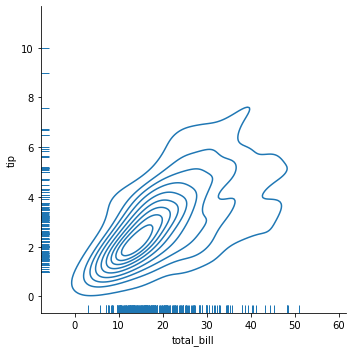

In [12]:
sns.displot(data=df, x="total_bill", y="tip", kind="kde",rug=True)

Podemos ver que mas o menos hay una relacion lineal entre el importe  y la propina aunque hay un claro comportamiento diferencial a partir de las 5 unidades de propina mas o menos 
Vamos a continuar analizando los datos. miraremos la distribuicion de estos por dias, a ver si el numero de datos es aproximadamente el mismo en cada un de los 4 dias 

In [13]:
datos_por_dia=pd.DataFrame(df['day'].value_counts())
datos_por_dia

,day
Sat,87
Sun,76
Thur,62
Fri,19


<AxesSubplot:>

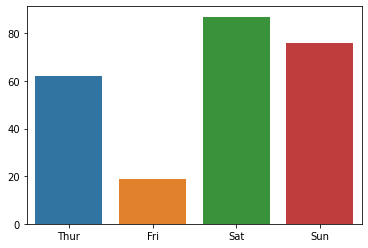

In [14]:
sns.barplot(x=df['day'].value_counts().index,y=df['day'].value_counts().values)

vemos claramente que el numero de entradas del viernes es muy inferio a la del sabado y el domingo. Devemos tener encuenta esto en nuestro analisis, para no caer en suposiciones erroneas como que los viernes se dan menos propinas que los sabados. continuamos con otras relaciones 

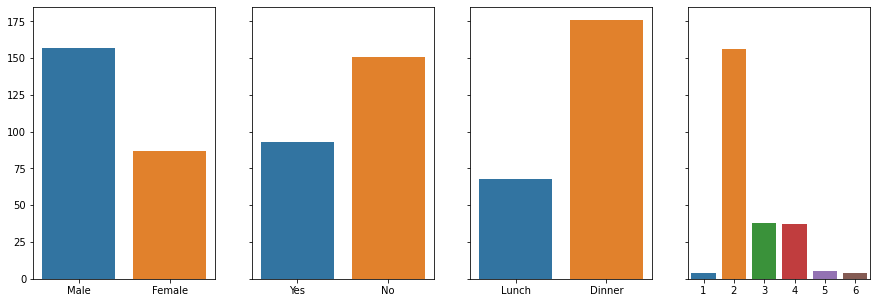

In [15]:
fig, axes = plt.subplots(1, 4, figsize=(15, 5), sharey=True)
num_column=0
for column in ['sex','smoker','time','size']:    
    sns.barplot(ax=axes[num_column],x=df[column].value_counts().index,y=df[column].value_counts().values)
    num_column+=1


Tambien podemos analizar como se distribuyen las facturas segun su importe, es decir donde se encuentra los importes más frecuentes
vamos a observar la correlacion entre las variables 

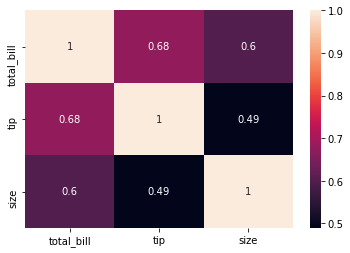

In [16]:
sns.heatmap(df.corr(), annot=True)
plt.show()

parece que hay dos relaciones deviles. el tamaño de la mesa y la factura, la factura y la propina

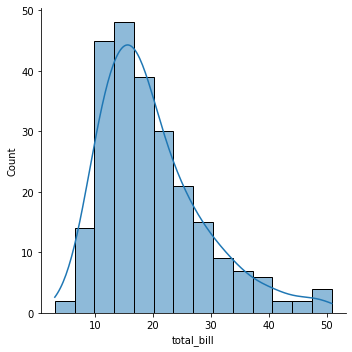

In [17]:
sns.displot(df['total_bill'],kde=True)


Miramos que tal son las propinas por sexo y factura

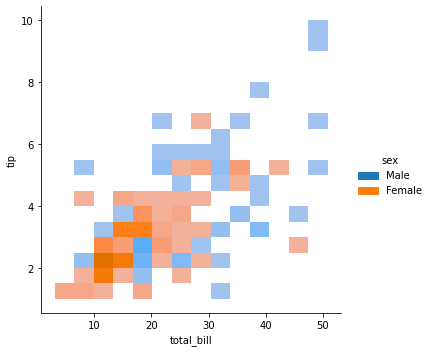

In [18]:
sns.displot(data=df, x="total_bill", y="tip", hue="sex")

podemos observar una tendencia a facturas más altas por parte de los hombres al igual que una proporcion más lineal en las propinas. 

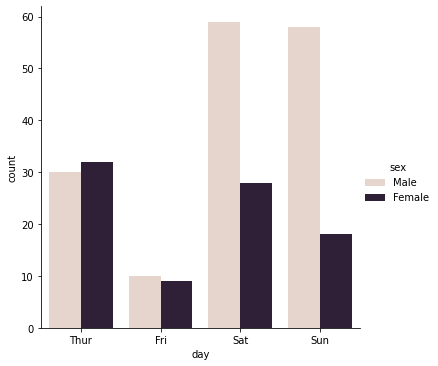

In [19]:
sns.catplot(x='day', data=df, hue='sex', palette='ch:0.1', kind='count')

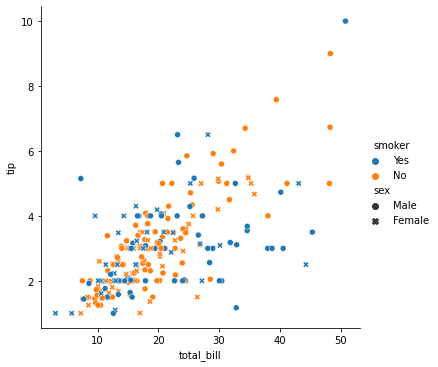

In [20]:
sns.relplot(x="total_bill", y="tip", hue="smoker", style="sex", data=df )


en este caso parece que los no fumadores son mas genereos con las propinas y tiene facturas mas altas 

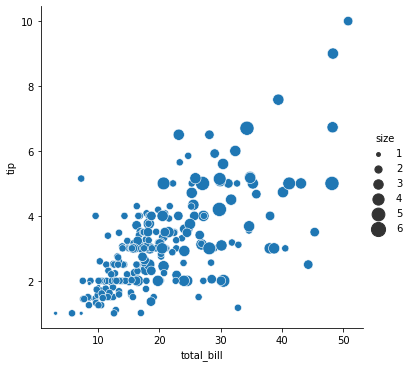

In [21]:
sns.relplot(x="total_bill", y="tip", size="size", sizes=(15, 200), data=df);


vamos tambien a visulizar la distribucion de los importes de las facturas y las propinas

Text(0.5, 1.0, 'Tip putos anomalos ')

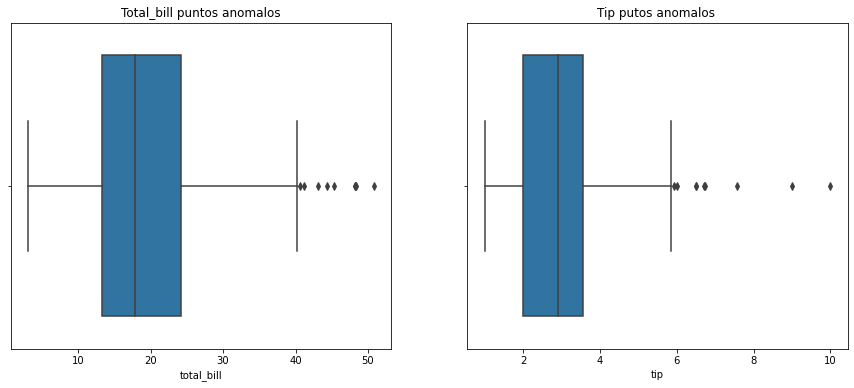

In [22]:
fig, axes = plt.subplots(1, 2,figsize=(15,6)) #
sns.boxplot(data=df,x='total_bill',  ax=axes[0]).set(title='Total_bill puntos anomalos') 
sns.boxplot(data=df,x='tip', ax=axes[1]).set_title('Tip putos anomalos ') 

vamos a calcular algunas relaciones, como, el porcentage de la propina que representa la factura, el porcentage de factura por comensal, y el porcentage 

In [23]:
df['tip_by_bill'] = round(df['tip'] / df['total_bill'] * 100, 2)
df['total_bill_by_person'] = round(df['total_bill'] / df['size'], 2)
df['tip_by_person'] = round(df['tip'] / df['size'], 2)
df.head()

,total_bill,tip,sex,smoker,day,time,size,tip_by_bill,total_bill_by_person,tip_by_person
0,16.99,1.01,Female,No,Sun,Dinner,2,5.94,8.49,0.50
1,10.34,1.66,Male,No,Sun,Dinner,3,16.05,3.45,0.55
2,21.01,3.50,Male,No,Sun,Dinner,3,16.66,7.00,1.17
3,23.68,3.31,Male,No,Sun,Dinner,2,13.98,11.84,1.66
4,24.59,3.61,Female,No,Sun,Dinner,4,14.68,6.15,0.90


/tmp/ipykernel_14034/253958.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  average=df.groupby('day')['total_bill','tip'].mean()


<AxesSubplot:xlabel='day', ylabel='total_bill'>

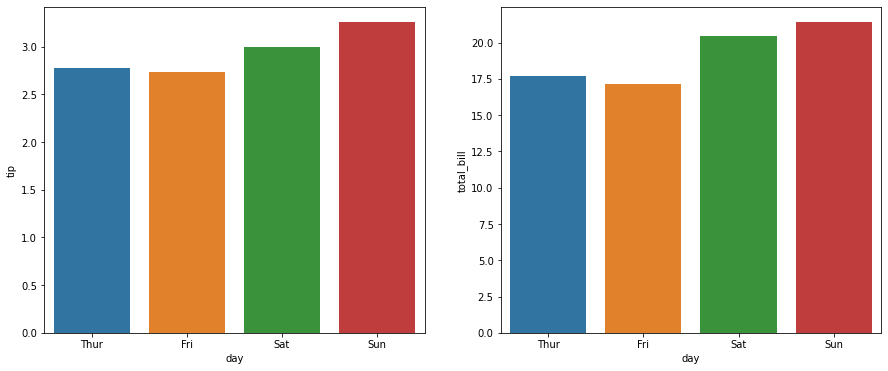

In [24]:
average=df.groupby('day')['total_bill','tip'].mean()
fig, axes = plt.subplots(1, 2,figsize=(15,6)) 
sns.barplot(x=average.index,y=average.tip,ax=axes[0])
sns.barplot(x=average.index,y=average.total_bill,ax=axes[1])

viendo la relacion entre el tamaño y la factura, parece que los tamaños más pequeños tienes facturas más pequeñas, y los más grandes ser organizan al redeor del 30

# Nivell 2
## - Exercici 2
Repeteix l'exercici 1 amb el dataset que disposem en el repositori de GitHub PRE-PROCESSING-DATA, movies.dat


In [25]:
import re
df = pd.read_csv("movies.dat", sep = "::",header=None,names = ['id','titulo','genero'], encoding="UTF-8",index_col=False, engine="python")

In [26]:

df= pd.concat([df,df.genero.str.get_dummies(sep='|').sum(level=0)],axis=1)

df.genero=df.genero.str.split('|',expand=False).sort_values()
df.titulo=df.titulo.replace(to_replace=r'\)', value='', regex=True).str.split('(',expand=False)
df[['titulo','anyo']] = pd.DataFrame(df.titulo.tolist(), index= df.index)
df.anyo=df.anyo.str.strip().astype("int64")
df.titulo=df.titulo.str.strip()
df.titulo = df.titulo.apply(lambda x: x.lower())

df.head()

/tmp/ipykernel_14034/2284452216.py:1: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  df= pd.concat([df,df.genero.str.get_dummies(sep='|').sum(level=0)],axis=1)


,id,titulo,genero,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,...,Mystery,News,Romance,Sci-Fi,Short,Sport,Thriller,War,Western,anyo
0,2844,fantômas - à l'ombre de la guillotine,"[Crime, Drama]",0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1913
1,4936,the bank,"[Comedy, Short]",0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1915
2,7264,the rink,"[Comedy, Short]",0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1916
3,8133,the immigrant,"[Short, Comedy, Drama, Romance]",0,0,0,0,0,1,0,...,0,0,1,0,1,0,0,0,0,1917
4,9968,broken blossoms or the yellow man and the girl,"[Drama, Romance]",0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1919


In [27]:
df.describe()

,id,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,...,Mystery,News,Romance,Sci-Fi,Short,Sport,Thriller,War,Western,anyo
count,7.505000e+03,7505.000000,7505.000000,7505.000000,7505.000000,7505.000000,7505.000000,7505.000000,7505.000000,7505.000000,...,7505.000000,7505.000000,7505.000000,7505.000000,7505.000000,7505.000000,7505.000000,7505.000000,7505.000000,7505.000000
mean,7.700602e+05,0.171619,0.000133,0.115523,0.037042,0.044237,0.321519,0.162425,0.053298,0.518454,...,0.087675,0.001332,0.180147,0.089540,0.020520,0.026516,0.269820,0.039440,0.013324,1997.839574
std,7.650337e+05,0.377074,0.011543,0.319673,0.188877,0.205635,0.467091,0.368865,0.224642,0.499693,...,0.282840,0.036481,0.384335,0.285541,0.141779,0.160674,0.443896,0.194653,0.114668,17.741063
min,2.844000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1898.000000
25%,1.070480e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1992.000000
50%,3.971030e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2005.000000
75%,1.417075e+06,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2010.000000
max,2.937482e+06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2013.000000


In [28]:
df.info(verbose=True,show_counts=True) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7505 entries, 0 to 7504
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           7505 non-null   int64 
 1   titulo       7505 non-null   object
 2   genero       7465 non-null   object
 3   Action       7505 non-null   int64 
 4   Adult        7505 non-null   int64 
 5   Adventure    7505 non-null   int64 
 6   Animation    7505 non-null   int64 
 7   Biography    7505 non-null   int64 
 8   Comedy       7505 non-null   int64 
 9   Crime        7505 non-null   int64 
 10  Documentary  7505 non-null   int64 
 11  Drama        7505 non-null   int64 
 12  Family       7505 non-null   int64 
 13  Fantasy      7505 non-null   int64 
 14  Film-Noir    7505 non-null   int64 
 15  History      7505 non-null   int64 
 16  Horror       7505 non-null   int64 
 17  Music        7505 non-null   int64 
 18  Musical      7505 non-null   int64 
 19  Mystery      7505 non-null 

Text(0.5, 1.0, 'Distribucion de generos de pelicula segun la años')

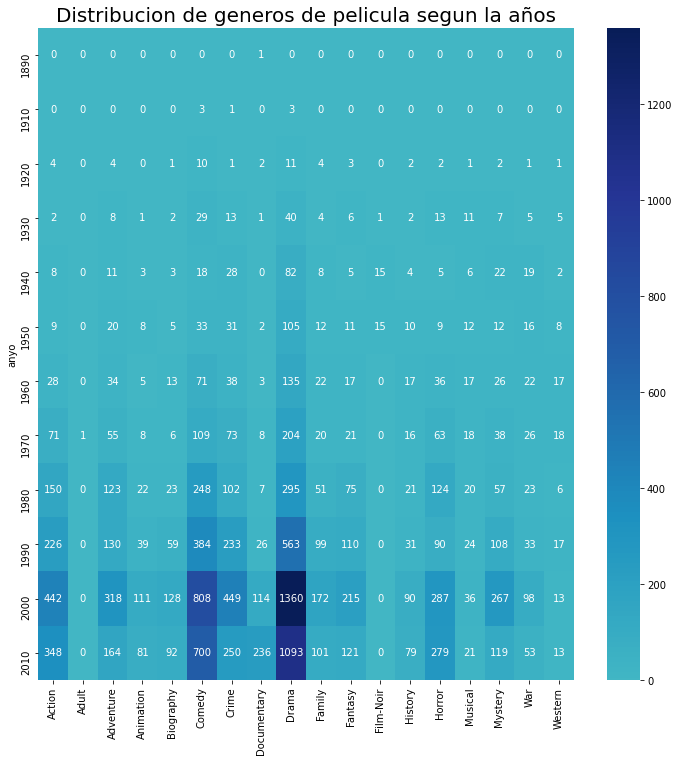

In [29]:
movies_by_year=df.groupby([10 * (df["anyo"] // 10)])[['Action', 'Adult','Adventure', 'Animation', 'Biography',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Family','Fantasy', 'Film-Noir', 'History','Horror', 'Musical',
       'Mystery',  'War','Western']].sum()
plt.figure(figsize=(12, 12))
sns.heatmap(movies_by_year, annot=True, fmt="d", robust=False, center=True, cmap='YlGnBu')
plt.title("Distribucion de generos de pelicula segun la años", fontsize=20)

Text(0.5, 1.0, 'Distribucion de pelicula segun la años')

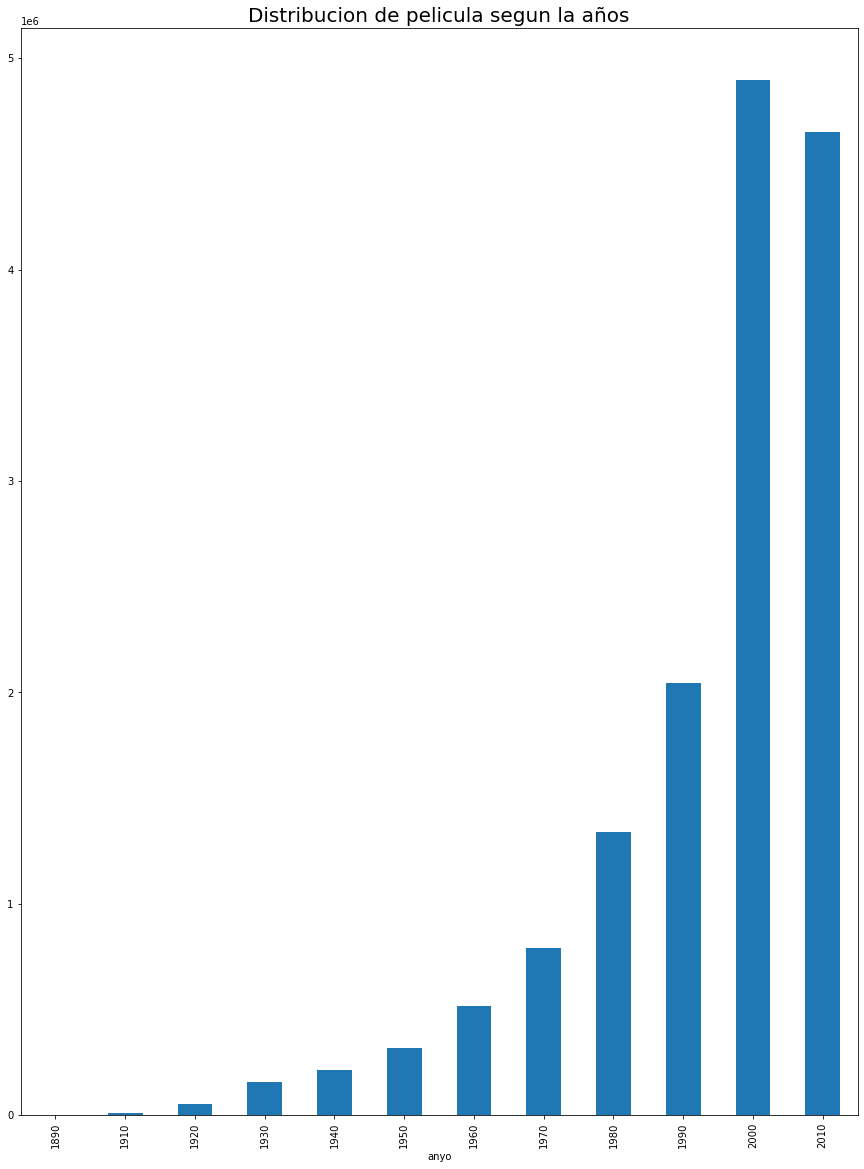

In [30]:

df.groupby([10 * (df["anyo"] // 10)])['anyo'].sum().plot.bar(figsize=(15, 20))
plt.title("Distribucion de pelicula segun la años", fontsize=20)

Buscamos la frecuencia en que aparece una palabra en los titulos del data frame

In [32]:
list_words_to_find=["love|amore|amor|chiamo","wedding|marriagemy|boda","die|morte|muerte","doctor|dr","james|boon",
"bullet|bala","missis|ms|mother|mama|madre","woman|women","dog|cat|pet",
"mr|man|men|hombre","sport|deporte","cinderela|cenicienta"]

df_by_word=pd.DataFrame([ (word,df.loc[(df.titulo.str.contains(word))].titulo.count())  
for word in list_words_to_find ],columns=["words","counts"])

df_by_word
                                                                    

,words,counts
0,love|amore|amor|chiamo,85
1,wedding|marriagemy|boda,12
2,die|morte|muerte,72
3,doctor|dr,148
4,james|boon,4
5,bullet|bala,12
6,missis|ms|mother|mama|madre,48
7,woman|women,19
8,dog|cat|pet,88
9,mr|man|men|hombre,394


<Figure size 864x864 with 0 Axes>

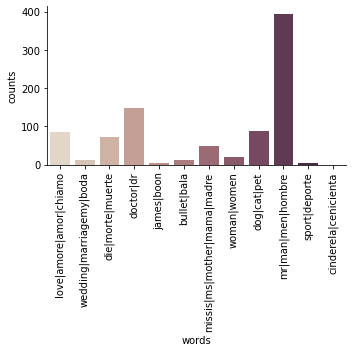

In [33]:
plt.figure(figsize=(12,12))
sns.catplot(x="words", y="counts", kind="bar",palette="ch:.25", data=df_by_word)
plt.xticks(rotation=90)
plt.tight_layout()

# Nivell 3
## - Exercici 3
En aquest exercici no us donarem gaires indicacions perquè volem que ens mostreu la vostra creativitat. Sorprèn-me amb gràfiques i interpretacions del dataset "movies.dat" del exercici anterior.